In [51]:
%run Preprocessing.ipynb
import pandas as pd
import numpy as np
import nbimporter
import feature_engineering
from datetime import datetime, timedelta
from functools import reduce
import glob
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
print("done")
#%run Preprocessing.ipynb

warnings.simplefilter(action='ignore', category=FutureWarning)

done


# 1. Preprocessing

## 1.1 Climate Data

### 1.1.1 Climate Data - Import and downsampling to 15min steps

In [3]:
climate_data = ["Temperature", "Precipitation"]
station_names = ["Berlin", "BW", "NRW"]
#temp_path =rf"C:\Users\Isabell\EMSI\emsi_ml\Wetter\{station}\{data}"
file_name = "produkt*"
date_column = "MESS_DATUM"
date_format = '%Y%m%d%H%M'

station_climate_list = []

for data in climate_data:
    for station in station_names:
        temp_path =rf"C:\Users\Isabell\EMSI\emsi_ml\Wetter\{station}\{data}"
        temperature_dic = importing_data(temp_path, file_name, date_column, date_format)
        for key, climate_df in temperature_dic.items():

            exclude_col = "DateTime"
            climate_df.columns = [station + col if col != exclude_col else col for col in climate_df.columns]
            nan_count = climate_df.isna().sum()
            print(nan_count)
        #print(temperature_dic)
        
        station_climate_list.append(temperature_dic)

#print(temperature_dic.keys())
print("done")

BerlinSTATIONS_ID    0
BerlinMESS_DATUM     0
Berlin  QN           0
BerlinPP_10          0
BerlinTT_10          0
BerlinTM5_10         0
BerlinRF_10          0
BerlinTD_10          0
Berlineor            0
DateTime             0
dtype: int64
BerlinSTATIONS_ID    0
BerlinMESS_DATUM     0
Berlin  QN           0
BerlinPP_10          0
BerlinTT_10          0
BerlinTM5_10         0
BerlinRF_10          0
BerlinTD_10          0
Berlineor            0
DateTime             0
dtype: int64
BerlinSTATIONS_ID    0
BerlinMESS_DATUM     0
Berlin  QN           0
BerlinPP_10          0
BerlinTT_10          0
BerlinTM5_10         0
BerlinRF_10          0
BerlinTD_10          0
Berlineor            0
DateTime             0
dtype: int64
BerlinSTATIONS_ID    0
BerlinMESS_DATUM     0
Berlin  QN           0
BerlinPP_10          0
BerlinTT_10          0
BerlinTM5_10         0
BerlinRF_10          0
BerlinTD_10          0
Berlineor            0
DateTime             0
dtype: int64
BerlinSTATIONS_ID    0
Berli

In [4]:
climate_resampled = []
for station in station_climate_list:
    resampled_dic = {}
    for key, climate_df in station.items():
        print("exec")
        #climate_df.reset_index(drop=True)
        try:
            climate_df.set_index("DateTime", inplace=True)
        except:
            pass
            #print(climate_df)
            
        numeric_cols = climate_df.select_dtypes(include='number').columns
        df_resampled_numeric = climate_df[numeric_cols].resample('15T').mean()
    
        # Resample non-numeric columns
        non_numeric_cols = climate_df.select_dtypes(exclude='number').columns
        df_resampled_non_numeric = climate_df[non_numeric_cols].resample('15T').agg(lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0])
    
        # Combine the resampled numeric and non-numeric dataframes
        df_resampled = pd.concat([df_resampled_numeric, df_resampled_non_numeric], axis=1)
    
        resampled_dic[key] = df_resampled
    climate_resampled.append(resampled_dic)
        #print(temperature_dic[key])
print("done")
print(len(climate_resampled))
print(climate_resampled[0])

exec
exec
exec
exec
exec
exec
exec
exec
exec
exec
exec
exec
exec
exec
exec
exec
exec
exec
exec
exec
exec
exec
exec
exec
exec
exec
exec
exec
exec
exec
done
6
{2012:                      BerlinSTATIONS_ID  BerlinMESS_DATUM  Berlin  QN  \
DateTime                                                               
2012-01-01 00:00:00              433.0      2.012010e+11         3.0   
2012-01-01 00:15:00              433.0      2.012010e+11         3.0   
2012-01-01 00:30:00              433.0      2.012010e+11         3.0   
2012-01-01 00:45:00              433.0      2.012010e+11         3.0   
2012-01-01 01:00:00              433.0      2.012010e+11         3.0   
...                                ...               ...         ...   
2012-12-31 22:45:00              433.0      2.012123e+11         3.0   
2012-12-31 23:00:00              433.0      2.012123e+11         3.0   
2012-12-31 23:15:00              433.0      2.012123e+11         3.0   
2012-12-31 23:30:00              433.0      

## 1.2 Importing Data - Football

In [86]:

temp_path =r"Spielplan"
file_name = "*.csv"
date_column = "DateTime"
date_format = '%d. %b %y %H:%M'
other_date_format = '%d.%m.%Y %H:%M'

help(importing_data)

football_dic = importing_data(temp_path, file_name, date_column, date_format, other_date_format, football_dataset = True)


    

Help on function importing_data in module __main__:

importing_data(temp_path, temp_file, column_name, *date_format, football_dataset=False)



## Adding new columns for Matches at same time

In [88]:

for key, match_set in football_dic.items():
    match_set["Land1"] = match_set["Land1"].str.strip()
    match_set["Land2"] = match_set["Land2"].str.strip()
    match_set = match_set.loc[:, ["Land1", "Land2", "Runde", "Liga", "DateTime"]]
    #print(spielplan)
    grouped = match_set.groupby("DateTime")
    results = pd.DataFrame()

    for name, group in grouped:
        if len(group) == 1:
            results = pd.concat([results, group])
        else:
            land1_value = group.iloc[0]['Land1']
            land2_value = group.iloc[0]['Land2']

            new_row = {
                "DateTime" : name,
                'Land1': land1_value,
                'Land2': land2_value,
                "Runde" : group.iloc[1]["Runde"],
                "Liga": group.iloc[1]["Liga"],
                'Land3': group.iloc[1]['Land1'],
                'Land4': group.iloc[1]['Land2'],
                
            }

            new_df = pd.DataFrame([new_row])

            results = pd.concat([results, new_df], ignore_index = True)
            
            
            
    results.set_index("DateTime")
    football_dic[key] = results

print(football_dic.keys())

dict_keys([2021, 2016, 2012, 2014, 2018])


## 1.3 Importing electricty data

In [123]:
temp_path =r"Stromverbrauch\Viertel"
file_name = "*.csv"
date_column = "Datum von"
date_format = '%d.%m.%Y %H:%M'

elec_dic = importing_data(temp_path, file_name, date_column, date_format)
print(elec_dic)
for key, df in elec_dic.items():
    zero_count = df.apply(lambda col: (col == 0).sum())

    #print(df.head())
    #print(df['Gesamt (Netzlast) [MWh] Originalauflösungen'])
    df['Gesamt (Netzlast) [MWh] Originalauflösungen'] = df['Gesamt (Netzlast) [MWh] Originalauflösungen'].str.replace('.', '', regex=False)
    df['Gesamt (Netzlast) [MWh] Originalauflösungen'] = df['Gesamt (Netzlast) [MWh] Originalauflösungen'].str.replace(',', '.', regex=False)
    #print(df['Gesamt (Netzlast) [MWh] Originalauflösungen'])
    # Step 2: Convert to numeric
    df['Gesamt (Netzlast) [MWh] Originalauflösungen'] = df['Gesamt (Netzlast) [MWh] Originalauflösungen'].astype(float)

    print(df)

    #print(df['Gesamt (Netzlast) [MWh] Originalauflösungen'])
    #print(df.dtypes)
    #print(zero_count)
#print(elec_dic.keys())

{2016:            Datum von         Datum bis  \
0   10.07.2016 00:00  10.07.2016 00:15   
1   10.07.2016 00:15  10.07.2016 00:30   
2   10.07.2016 00:30  10.07.2016 00:45   
3   10.07.2016 00:45  10.07.2016 01:00   
4   10.07.2016 01:00  10.07.2016 01:15   
..               ...               ...   
91  10.07.2016 22:45  10.07.2016 23:00   
92  10.07.2016 23:00  10.07.2016 23:15   
93  10.07.2016 23:15  10.07.2016 23:30   
94  10.07.2016 23:30  10.07.2016 23:45   
95  10.07.2016 23:45  11.07.2016 00:00   

   Gesamt (Netzlast) [MWh] Originalauflösungen            DateTime  
0                                    10.603,75 2016-07-10 00:00:00  
1                                    10.444,50 2016-07-10 00:15:00  
2                                    10.283,50 2016-07-10 00:30:00  
3                                    10.237,75 2016-07-10 00:45:00  
4                                    10.018,50 2016-07-10 01:00:00  
..                                         ...                 ...  
91   

## 1.4 Merging Dataframes, dropping unwanted columns, filling nans with during match with data from football dataset

In [120]:
dfs = []

unwantend_col_string = ["QN", "MESS_DATUM", 'Datum von', 'Datum bis', "eor", "STATIONS"]
print(elec_dic)
for key, elec in elec_dic.items():
    dfs_year = []
    dfs_year.append(pd.DataFrame(elec))
    dfs_year.append(pd.DataFrame(football_dic[key]))
    
    start_elec = elec["DateTime"].iloc[0]
    end_elec = elec["DateTime"].iloc[-1]
    print(start_elec)
    print(end_elec)
    print(elec)
    for station in climate_resampled:
        dfs_year.append(pd.DataFrame(station[key]))
        #print(station[key]["DateTime"])
    #print(dfs_year)
    merged_df = reduce(lambda left, right: pd.merge(left, right, on='DateTime', how='outer'), dfs_year)

    #print(merged_df["Land1"].unique())

    #print(elec)
    spielplan_name_list = football_dic[key].columns.tolist()
    print(spielplan_name_list)
    #print(football_dic[key])
    for index, row in football_dic[key].iterrows():
        start_time = row["DateTime"]
        
        until_time = row["DateTime"] + timedelta(minutes=105)
        #print(until_time)
        fill_condition = (merged_df['DateTime']>= start_time) & (merged_df['DateTime'] <= until_time)
        
        merged_df.loc[fill_condition,spielplan_name_list] = merged_df.loc[fill_condition, spielplan_name_list].fillna(method='ffill')

    print(merged_df.columns)
    for string in unwantend_col_string:
        merged_df = merged_df.drop(columns = merged_df.filter(like=string).columns)
        
    merged_df = merged_df[(merged_df["DateTime"] >= start_elec) & (merged_df["DateTime"] <= end_elec)]
    print(merged_df)
    dfs.append(merged_df)

endresult_df = pd.concat(dfs, ignore_index = True)

#print(endresult_df)


{2016:            Datum von         Datum bis  \
0   10.07.2016 00:00  10.07.2016 00:15   
1   10.07.2016 00:15  10.07.2016 00:30   
2   10.07.2016 00:30  10.07.2016 00:45   
3   10.07.2016 00:45  10.07.2016 01:00   
4   10.07.2016 01:00  10.07.2016 01:15   
..               ...               ...   
91  10.07.2016 22:45  10.07.2016 23:00   
92  10.07.2016 23:00  10.07.2016 23:15   
93  10.07.2016 23:15  10.07.2016 23:30   
94  10.07.2016 23:30  10.07.2016 23:45   
95  10.07.2016 23:45  11.07.2016 00:00   

    Gesamt (Netzlast) [MWh] Originalauflösungen            DateTime  
0                                      10603.75 2016-07-10 00:00:00  
1                                      10444.50 2016-07-10 00:15:00  
2                                      10283.50 2016-07-10 00:30:00  
3                                      10237.75 2016-07-10 00:45:00  
4                                      10018.50 2016-07-10 01:00:00  
..                                          ...                 ... 

## 1.6 Correlation matrix

['Land1', 'Land2', 'Land3', 'Land4', 'Runde', 'Liga']
['Gesamt (Netzlast) [MWh] Originalauflösungen', 'DateTime', 'BerlinSTATIONS_ID_x', 'BerlinPP_10', 'BerlinTT_10', 'BerlinTM5_10', 'BerlinRF_10', 'BerlinTD_10', 'BWSTATIONS_ID_x', 'BWPP_10', 'BWTT_10', 'BWTM5_10', 'BWRF_10', 'BWTD_10', 'NRWSTATIONS_ID_x', 'NRWPP_10', 'NRWTT_10', 'NRWTM5_10', 'NRWRF_10', 'NRWTD_10', 'BerlinSTATIONS_ID_y', 'BerlinRWS_DAU_10', 'BerlinRWS_10', 'BerlinRWS_IND_10', 'BWSTATIONS_ID_y', 'BWRWS_DAU_10', 'BWRWS_10', 'BWRWS_IND_10', 'NRWSTATIONS_ID_y', 'NRWRWS_DAU_10', 'NRWRWS_10', 'NRWRWS_IND_10']
                                             Gesamt (Netzlast) [MWh] Originalauflösungen  \
Gesamt (Netzlast) [MWh] Originalauflösungen                                     1.000000   
DateTime                                                                       -0.036130   
BerlinSTATIONS_ID_x                                                                  NaN   
BerlinPP_10                                           

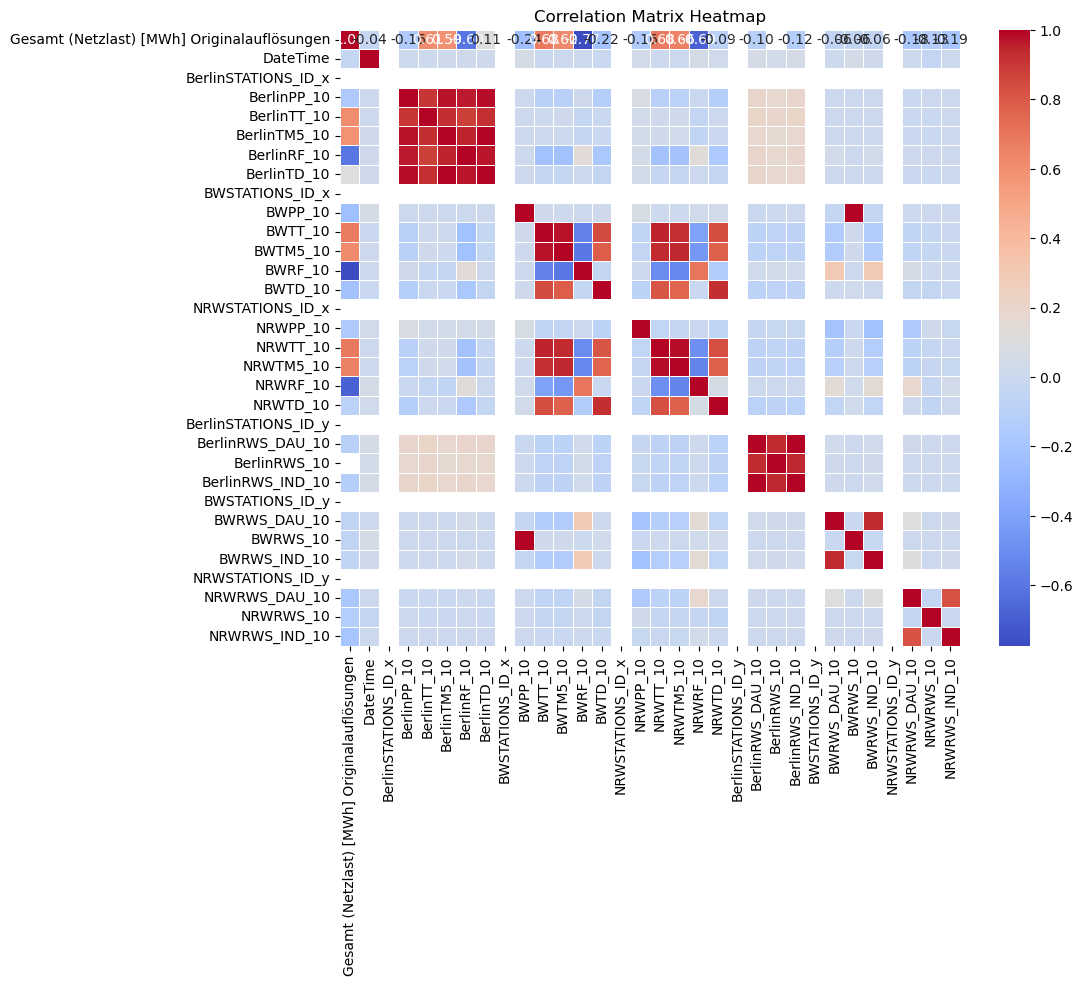

Columns kept: ['Gesamt (Netzlast) [MWh] Originalauflösungen', 'BerlinSTATIONS_ID_x', 'BerlinTT_10', 'BerlinTM5_10', 'BerlinRF_10', 'BWSTATIONS_ID_x', 'BWTT_10', 'BWTM5_10', 'BWRF_10', 'NRWSTATIONS_ID_x', 'NRWTT_10', 'NRWTM5_10', 'NRWRF_10', 'BerlinSTATIONS_ID_y', 'BerlinRWS_10', 'BWSTATIONS_ID_y', 'NRWSTATIONS_ID_y']


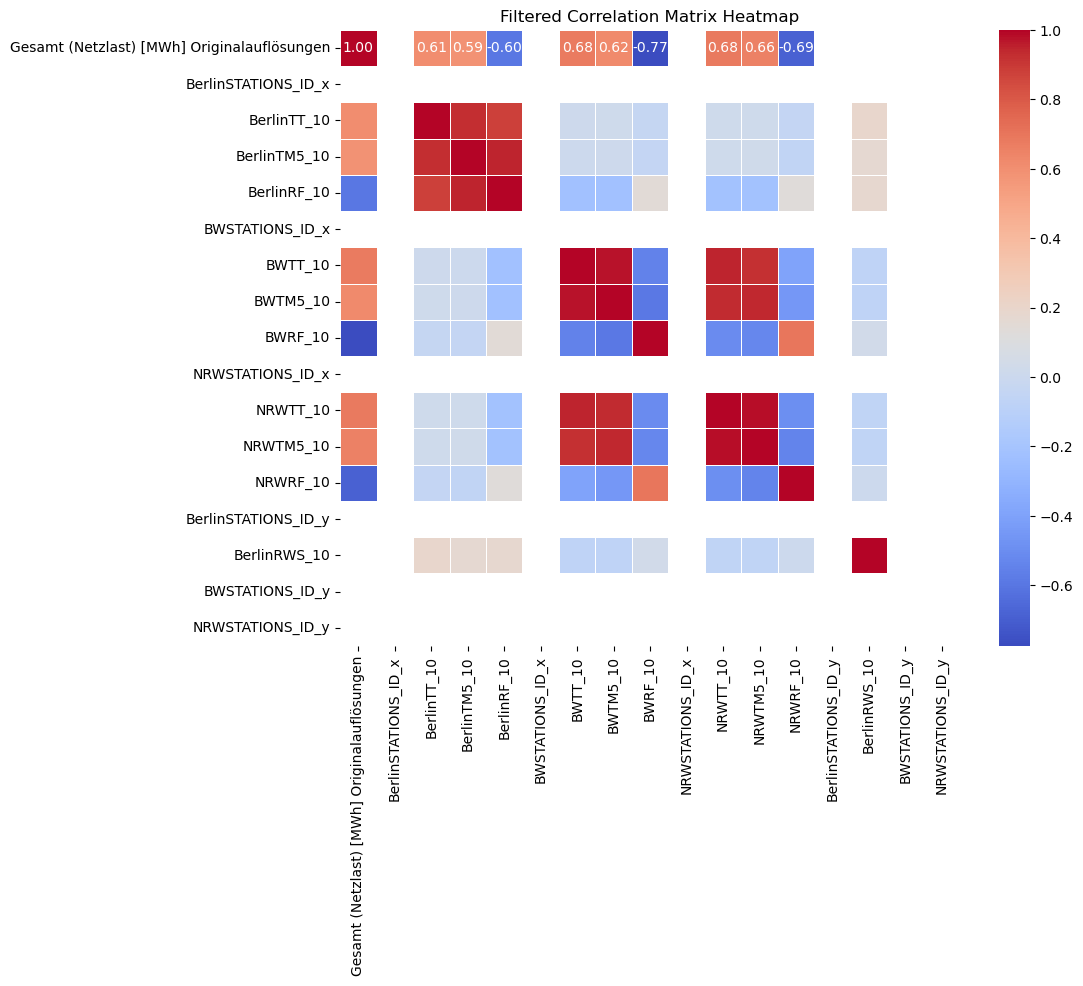

In [113]:
categorical_columns = ["Land1", "Land2", "Land3", "Land4", "Runde", "Liga"]
print(categorical_columns)

columns_to_keep = [col for col in df_encoded.columns if not any(excl in col for excl in categorical_columns)]
print(columns_to_keep)
df_relevant = df_encoded[columns_to_keep]  
correlation_matrix = df_relevant.corr()
print(correlation_matrix)

# Set the size of the figure
plt.figure(figsize=(10, 8))

# Create the heat map
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

target_column = "Gesamt (Netzlast) [MWh] Originalauflösungen"

columns_to_drop = correlation_matrix.index[abs(correlation_matrix[target_column]) < 0.5].tolist()

# Drop those columns from df_relevant
df_filtered = df_relevant.drop(columns=columns_to_drop)

# Print the columns that were kept
print(f"Columns kept: {df_filtered.columns.tolist()}")

# If you want to replot the correlation matrix for the filtered dataframe
filtered_correlation_matrix = df_filtered.corr()

plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a title
plt.title('Filtered Correlation Matrix Heatmap')

# Show the plot
plt.show()

Columns dropped: ['BWTM5_10', 'BerlinTM5_10', 'BerlinRF_10', 'NRWTM5_10', 'NRWTT_10']
Columns kept: ['Gesamt (Netzlast) [MWh] Originalauflösungen', 'BerlinSTATIONS_ID_x', 'BerlinTT_10', 'BWSTATIONS_ID_x', 'BWTT_10', 'BWRF_10', 'NRWSTATIONS_ID_x', 'NRWRF_10', 'BerlinSTATIONS_ID_y', 'BerlinRWS_10', 'BWSTATIONS_ID_y', 'NRWSTATIONS_ID_y']


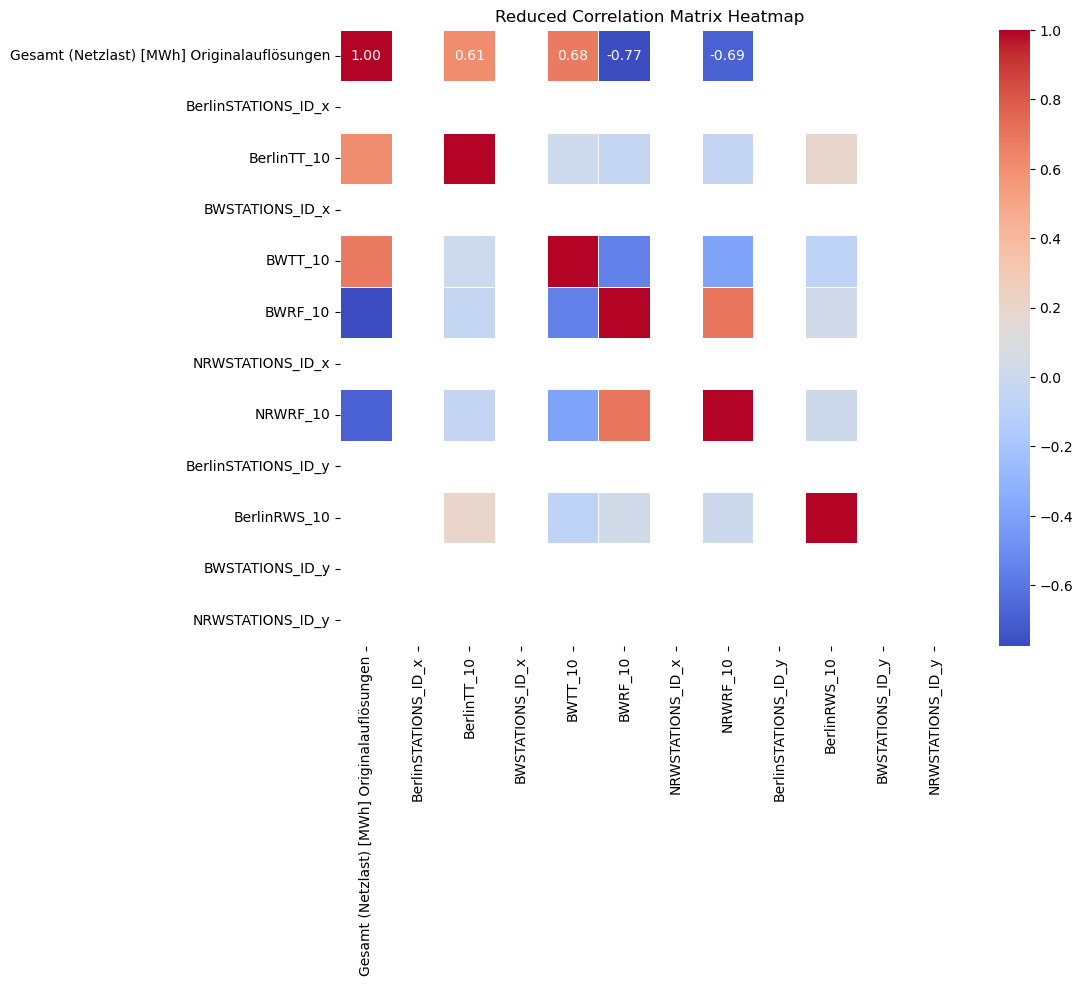

In [114]:
# Set the correlation threshold
correlation_threshold = 0.9  # Adjust this threshold as needed

# Calculate the correlation matrix
correlation_matrix = df_filtered.corr().abs()

# Create a boolean mask to identify the upper triangle of the correlation matrix
upper_triangle_mask = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)

# Find the pairs of columns with correlation above the threshold
high_correlation_pairs = [(correlation_matrix.columns[i], correlation_matrix.columns[j])
                          for i, j in zip(*np.where(correlation_matrix > correlation_threshold))
                          if upper_triangle_mask[i, j]]

# Identify the columns to drop
columns_to_drop = set([pair[1] for pair in high_correlation_pairs])

# Drop the highly correlated columns
df_reduced = df_filtered.drop(columns=columns_to_drop)

# Print the columns that were dropped
print(f"Columns dropped: {list(columns_to_drop)}")

# Print the columns that were kept
print(f"Columns kept: {df_reduced.columns.tolist()}")

# If you want to replot the correlation matrix for the reduced dataframe
reduced_correlation_matrix = df_reduced.corr()

# Set the size of the figure
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(reduced_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a title
plt.title('Reduced Correlation Matrix Heatmap')

# Show the plot
plt.show()

## 1.5 Encoding categorical values

In [99]:
print(endresult_df["Land2"].unique())
categorical_columns = ["Land1", "Land2", "Land3", "Land4", "Runde", "Liga"]
df_encoded = pd.get_dummies(endresult_df, columns = categorical_columns)
print(df_encoded.columns)

[nan 'Frankreich' 'Rumänien' 'Schweiz' 'Slowakei' 'Russland' 'Kroatien'
 'Nordirland' 'Ukraine' 'Tschechien' 'Schweden' 'Italien' 'Ungarn'
 'Island' 'Albanien' 'Wales' 'Polen' 'Türkei' 'Irland' 'Österreich'
 'England' 'Deutschland' 'Spanien' 'Portugal' 'Belgien' 'Saudi-Arabien'
 'Uruguay' 'Iran' 'Australien' 'Dänemark' 'Nigeria' 'Serbien' 'Mexiko'
 'Südkorea' 'Panama' 'Japan' 'Senegal' 'Ägypten' 'Marokko' 'Peru'
 'Costa Rica' 'Tunesien' 'Kolumbien' 'Argentinien' 'Brasilien' 'Finnland'
 'Nordmazedonien' 'Schottland' 'Niederlande']
Index(['Gesamt (Netzlast) [MWh] Originalauflösungen', 'DateTime',
       'BerlinSTATIONS_ID_x', 'BerlinPP_10', 'BerlinTT_10', 'BerlinTM5_10',
       'BerlinRF_10', 'BerlinTD_10', 'BWSTATIONS_ID_x', 'BWPP_10',
       ...
       'Land4_Ägypten', 'Land4_Österreich', 'Runde_Achtelfinale',
       'Runde_Finale', 'Runde_Gruppenphase', 'Runde_Halbfinale',
       'Runde_Spiel um Platz 3', 'Runde_Viertelfinale', 'Liga_EM', 'Liga_WM'],
      dtype='object', length=163)


## 1.7 Normalizing Data for better performance

In [108]:
print(df_reduced)

        Gesamt (Netzlast) [MWh] Originalauflösungen  BerlinTT_10  BWTT_10  \
0                                          10603.75        18.60    18.50   
1                                          10444.50        18.60    18.30   
2                                          10283.50        18.60    18.20   
3                                          10237.75        18.60    18.10   
4                                          10018.50        18.60    17.75   
...                                             ...          ...      ...   
105211                                          NaN        11.90     8.70   
105212                                          NaN        11.85     9.65   
105213                                          NaN        11.80    10.80   
105214                                          NaN        11.85    10.85   
105215                                          NaN        11.90    10.30   

        BWRF_10  NRWRF_10  BerlinRWS_10  
0         74.65     84.00        

## 1.8 Extracting Features out of DateTime